In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale


# jupyter notebook 사용 시 그래프 자동 출력 옵션
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

# 음수 표시
plt.rc('axes', unicode_minus=False)
# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

# 실습_탐색적 분석

데이터 분석 모델링 전에 데이터를 이해하고 분석방향을 설정하기 위해 탐색적 분석을 실시하시오.
- 데이터 셋 : Titanic.CSV(변수:12, 자료 수: 891개)
- 종속변수 : Survived(생존여부) - Survival(0=No, 1=Yes)
> - Pclass: 승객 등급. 1, 2, 3등석
> - Name, Sex, Age : 이름 그대로 의미입니다.
> - Sibsp : 함께 탑승한 형제, 배우자의 수.
> - Parch : 함께 탑승한 자녀, 부모의 수.
> - Ticket : 티켓 아이디
> - Fare : 티켓 요금(파운드)
> - Cabin : 객실 번호
> - Embarked : 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

In [2]:
# 데이터 불러오기
data=pd.read_csv("../data/Titanic.csv", engine='python')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 데이터 속성 및 기술통계량 확인

In [3]:
# 데이터 속성 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 기술통계량 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. 목표변수 및 설명변수의 분포 확인

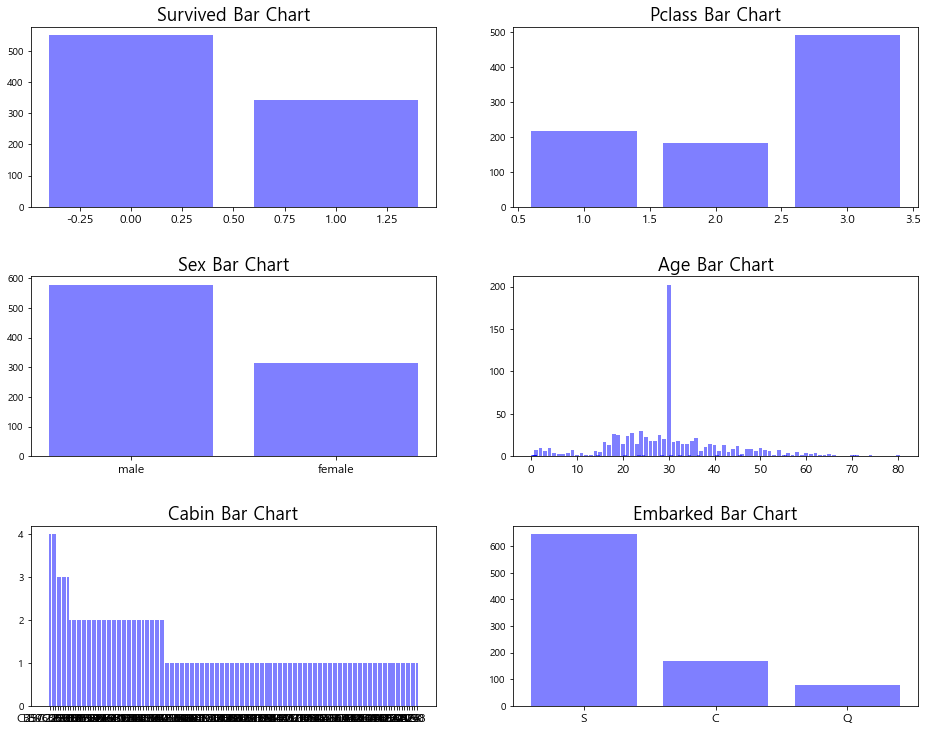

In [5]:
# 목표변수 및 설명변수의 분포 확인(bar plot)
check_col=['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Embarked']
fig=plt.subplots(nrows=3, ncols=2, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

for i in range(len(check_col)):
    df=data[check_col[i]].value_counts()
    plt.subplot(3, 2, i+1)
    plt.bar(df.index, df.values, color='blue', alpha=0.5)
    plt.title(check_col[i]+' Bar Chart', fontsize=18)
    plt.xticks(fontsize=12)
plt.show()    

> survived, pclass, age 변수는 연속형 변수라 x축이 연속적으로 표현됨(그냥 중간 값으로 보면 됨.)
> 1. 생존자보다 사망자가 더 많다.
> 2. 1등성과 2등석의 승객수는 비슷하고 3등석의 승객수가 가장 많다.
> 3. 남성이 여성보다 두배 가량 많다.
> 4. 30대 승객이 가장 많다.(하지만 다른 구간과 비교가 어렵다)
> 5. Cabin 데이터는 전처리가 되어있지 않아 결과를 이해하기 어렵다.
> 6. 승객은 S에 가장 많이 탑승하였다.

>> Age와 Cabin Bar Chart는 데이터 처리 후 다시 보이겠다.

## 3. 변수들의 결측 및 이상치 처리 & 데이터 파생 및 변환

In [6]:
# 변수들의 결측 및 이상치 처리
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cabin 결측치는 양이 상당하므로 '확인불가' 의미로 "X"라는 새로운 범주로 묶는다.
data["Cabin"]=data["Cabin"].fillna("X")
# Embarked 결측치 2개는 압도적인 빈도수인 S로 전처리
data["Embarked"]=data["Embarked"].fillna('S')
# 전처리 후 다시 결측 확인
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# 파생변수 생성
# Family = SibSp+Parch
data["Family"]=data["SibSp"]+data["Parch"]

# Cabin_clf : 객실 번호 맨 앞자리 알파벳
data["Cabin_clf"]=data["Cabin"].apply(lambda x: x[0])

# Age도 각각 10대, 20대 ... 그룹으로(수치형 데이터 -> 범주형 데이터)
data["Age_gr"]=data["Age"].apply(lambda x: str(int((x//10)*10))+'대')

# 새로운 data 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Cabin_clf,Age_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,1,X,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,0,X,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,0,X,30대


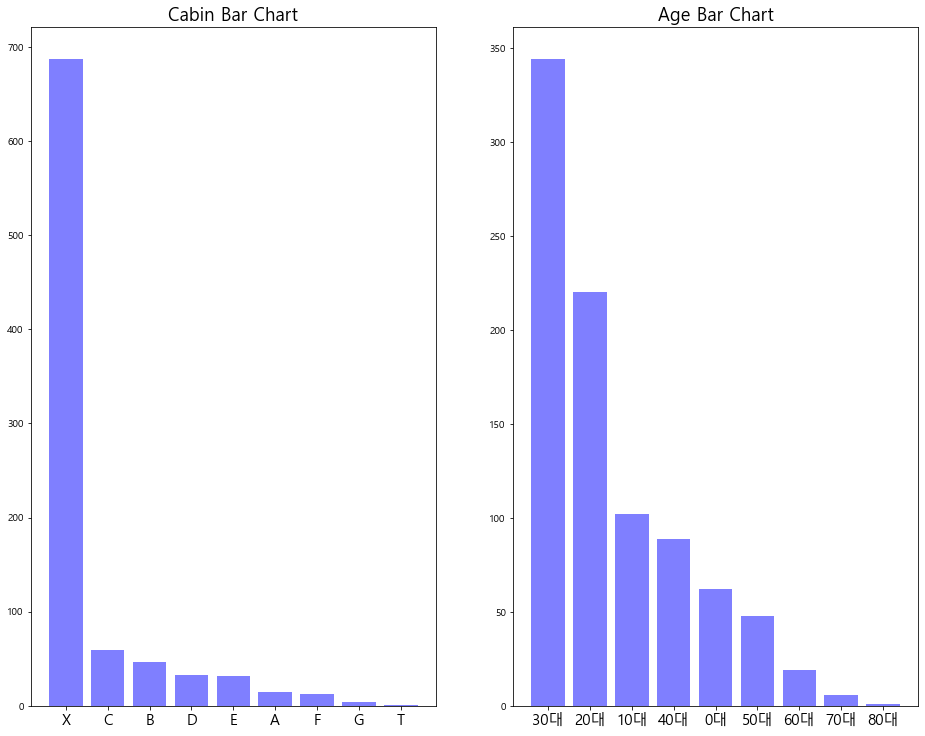

In [9]:
fig=plt.subplots(nrows=1, ncols=2, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

# Cabin 변수를 처리한 후 다시 bar chart를 그려봄
df_Cabin=data["Cabin_clf"].value_counts()
plt.subplot(1, 2, 1)
plt.bar(df_Cabin.index, df_Cabin.values, color='blue', alpha=0.5)
plt.title('Cabin Bar Chart', fontsize=18)
plt.xticks(fontsize=15)

# Age 변수도 수정 후 다시 bar chart를 그려봄
df_Age=data["Age_gr"].value_counts()
plt.subplot(1, 2, 2)
plt.bar(df_Age.index, df_Age.values, color='blue', alpha=0.5)
plt.title('Age Bar Chart', fontsize=18)
plt.xticks(fontsize=15)

plt.show()

> Cabin : 확인 불가능한 객실이 가장 많고, C->B->D->E->A->F->G->T 순으로 승객이 머문 객실이다.  
> Age : 30대->20대->10대->40대->0대(1~9살)->50대->60대->70대->80대 순으로 승객이 많다.

## 4. 그래프 분석을 통해 변수간 관계를 확인

#### 수치형 데이터

- 연속형 데이터 변수 간의 상관성 분석

<AxesSubplot:title={'center':'Person Correlation of Features'}>

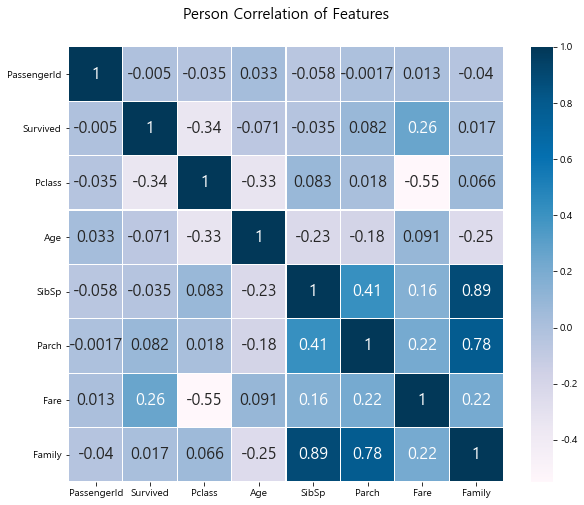

In [10]:
# 범주형 변수도 같이 상관성 분석을 하고 싶으면 one-hot-encoding 방법 사용
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(data.corr(), 
            linewidths = 0.1, 
            vmax = 1.0, 
            square = True, 
            cmap = colormap, 
            linecolor = "white", 
            annot = True, 
            annot_kws = {"size" : 16})

> heatmap을 보았을 때, 생존율과 각각의 연속형 데이터 간의 뚜렷한 상관성이 있다고 볼 수 없다.

#### 범주형 데이터(Name과 Ticket은 제외)

- 나이와 생존 변수간의 관계

<AxesSubplot:xlabel='Survived,Age_gr'>

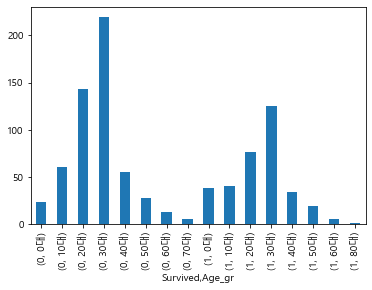

In [11]:
# 각 나이대의 생존여부 bar chart
df_groupby_total= data.groupby(["Survived", "Age_gr"], as_index=True).size()
df_groupby_total.plot.bar()

<AxesSubplot:ylabel='None'>

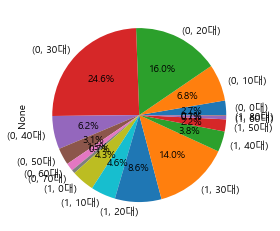

In [12]:
# 각 나이대의 생존여부 pie chart
df_count=data.groupby(["Survived", "Age_gr"]).size()
df_count.plot.pie(y="Fare", autopct="%.1f%%") # y값은 아무거나 설정 가능

In [13]:
# 각 나이대별 생존율
Age_gr=np.sort(data["Age_gr"].unique())

data_survive_prop=pd.DataFrame()
for i in Age_gr:
    data_survive_prop[i]=(data[(data["Survived"]==1)&(data["Age_gr"]==i)]["Survived"].value_counts())/(data[data["Age_gr"]==i]["Survived"].value_counts().sum())

data_survive_prop.fillna(0)

,0대,10대,20대,30대,40대,50대,60대,70대,80대
1,0.612903,0.401961,0.35,0.363372,0.382022,0.416667,0.315789,0.0,1.0


> __결론 : 위의 자료들을 보았을 때, 어린 아이들을 우선적으로 구조했다고 생각할 수 있다.__  
> (80대의 경우 판단을 내리기엔 모집단의 수가 적다.)

- 성별과 생존 변수간의 관계

<AxesSubplot:xlabel='Survived,Sex'>

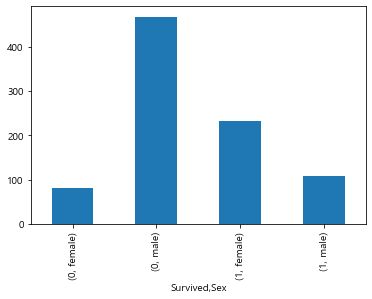

In [14]:
# 각 성별 생존여부 bar chart
df_groupby_total= data.groupby(["Survived", "Sex"], as_index=True).size()
df_groupby_total.plot.bar()

<AxesSubplot:ylabel='None'>

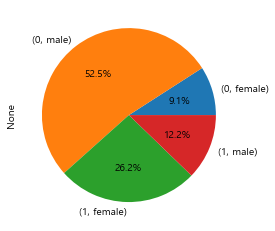

In [15]:
# 각 성별 생존여부 pie chart
df_count=data.groupby(["Survived", "Sex"]).size()
df_count.plot.pie(y="Fare", autopct="%.1f%%")  # y값은 아무거나 설정 가능

In [16]:
# 각 성별 생존율
Sex=np.sort(data["Sex"].unique())

data_survive_prop=pd.DataFrame()
for i in Sex:
    data_survive_prop[i]=(data[(data["Survived"]==1)&(data["Sex"]==i)]["Survived"].value_counts())/(data[data["Sex"]==i]["Survived"].value_counts().sum())

data_survive_prop.fillna(0)

,female,male
1,0.742038,0.188908


> __결론 : 위의 자료들을 보았을 때, 여성을 우선적으로 구조했다고 생각할 수 있다.__  

- 각 객실과 생존 변수간의 관계

<AxesSubplot:xlabel='Survived,Cabin_clf'>

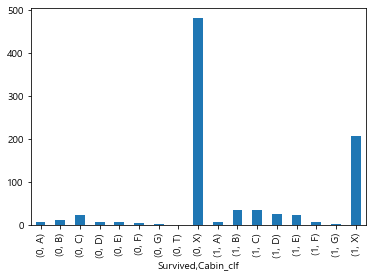

In [17]:
# 각 객실별 생존여부 bar chart
df_groupby_total= data.groupby(["Survived", "Cabin_clf"], as_index=True).size()
df_groupby_total.plot.bar()

<AxesSubplot:ylabel='None'>

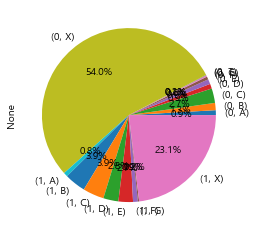

In [18]:
# 각 객실별 생존여부 pie chart
df_count=data.groupby(["Survived", "Cabin_clf"]).size()
df_count.plot.pie(y="Fare", autopct="%.1f%%")  # y값은 아무거나 설정 가능

In [19]:
# 각 객실별 생존율
Cabin_clf=np.sort(data["Cabin_clf"].unique())

data_survive_prop=pd.DataFrame()
for i in Cabin_clf:
    data_survive_prop[i]=(data[(data["Survived"]==1)&(data["Cabin_clf"]==i)]["Survived"].value_counts())/(data[data["Cabin_clf"]==i]["Survived"].value_counts().sum())

data_survive_prop.fillna(0)

,A,B,C,D,E,F,G,T,X
1,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0,0.299854


> __결론 : 위의 자료들을 보았을 때, B, D, E 객실의 승객들이 구조하기에 위치적으로 좋았다고 생각할 수 있다.__    
> (하지만 이 데이터의 경우 결측치가 상당히 크기 때문에 판단의 근거가 부족하다.)

- 각 (승객이 탑승한)선착장과 생존 변수간의 관계

<AxesSubplot:xlabel='Survived,Embarked'>

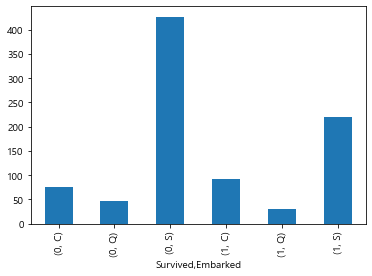

In [20]:
# 각 선착장별 생존여부 bar chart
df_groupby_total= data.groupby(["Survived", "Embarked"], as_index=True).size()
df_groupby_total.plot.bar()

<AxesSubplot:ylabel='None'>

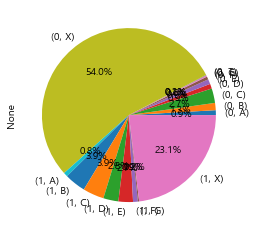

In [21]:
# 각 선착장별 생존여부 pie chart
df_count=data.groupby(["Survived", "Cabin_clf"]).size()
df_count.plot.pie(y="Fare", autopct="%.1f%%")  # y값은 아무거나 설정 가능

In [22]:
# 각 선착장별 생존율
Embarked=np.sort(data["Embarked"].unique())

data_survive_prop=pd.DataFrame()
for i in Embarked:
    data_survive_prop[i]=(data[(data["Survived"]==1)&(data["Embarked"]==i)]["Survived"].value_counts())/(data[data["Embarked"]==i]["Survived"].value_counts().sum())

data_survive_prop.fillna(0)

,C,Q,S
1,0.553571,0.38961,0.339009


> __결론 : 위의 자료들을 보았을 때, Cherbourg 선착장에서 탑승한 승객들이 구조하기에 위치적으로 좋았다고 생각할 수 있다.__    
> (하지만 같은 선착장에서 탑승한 승객들이 근처의 객실에 머물었다는 근거가 없으므로   
> 대한 타당성이 부족하다.)

## 5. 생존에 영향을 미치는 잠재 인자 도출

**[결론]**   
위의 탐색적 분석 데이터들을 근거로
__나이대__와 __성별__이 생존에 영향을 미치는 변수로서 작용했다고 볼 수 있다.